In [ ]:
!pip3 install torch torchvision Pillow

In [ ]:
!nvcc --version
import torch
import torchvision
import torchvision.transforms as transforms
print(torch.cuda.is_available())

In [ ]:
haveCuda = torch.cuda.is_available()

In [ ]:
haveCuda

#Data

##CIFAR10

In [ ]:
train_set = torchvision.datasets.CIFAR10(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.RandomCrop(32, padding=0),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ])
)

In [ ]:
test_set = torchvision.datasets.CIFAR10(
    root='./data'
    ,train=False
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor(),
    ])
)

In [ ]:
loader = torch.utils.data.DataLoader(train_set, batch_size=len(train_set), num_workers=1)
data = next(iter(loader))
trainMean = data[0].mean()
trainStd = data[0].std()

In [ ]:
trainMean

tensor(0.4734)

In [ ]:
trainStd

tensor(0.2516)

In [ ]:
loader = torch.utils.data.DataLoader(test_set, batch_size=len(test_set), num_workers=1)
data = next(iter(loader))
testMean = data[0].mean()
testStd = data[0].std()

In [ ]:
testMean

tensor(0.4766)

In [ ]:
testStd

tensor(0.2512)

In [ ]:
import shutil

In [ ]:
shutil.rmtree("/content/data")

###Data augmentation transformations

In [ ]:
import torchvision
import torchvision.transforms as transforms
  
transform = transforms.Compose([
    transforms.RandomCrop(32, padding=0),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(trainMean,trainStd)
])
transformTest = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(testMean, testStd)
])

###Database

In [ ]:
trainSet = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainLoader = torch.utils.data.DataLoader(trainSet, batch_size=128,
                                          shuffle=True, num_workers=2)

testSet = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transformTest)
testLoader = torch.utils.data.DataLoader(testSet, batch_size=128,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

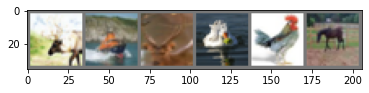

   deer    ship    deer    bird    bird   horse


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = (img * trainStd) + trainMean      # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainLoader)
images, labels = dataiter.next()

sampleImages = []
for i in range(6):
    sampleImages.append(images[i])
    
# show images
imshow(torchvision.utils.make_grid(sampleImages))
# print labels
print(' '.join('%7s' % classes[labels[j]] for j in range(6)))

##MNIST

In [ ]:
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz
!tar -zxvf MNIST.tar.gz

In [ ]:
from torchvision.datasets import MNIST

In [ ]:
train_set = MNIST(
    root='./'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        # transforms.RandomCrop(28, padding=0),
        # transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ])
)

In [ ]:
valid_set = MNIST(
    root='./'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        # transforms.RandomCrop(28, padding=0),
        # transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ])
)

In [ ]:
test_set = torchvision.datasets.MNIST(
    root='./'
    ,train=False
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor(),
    ])
)

In [ ]:
loader = torch.utils.data.DataLoader(train_set, batch_size=len(train_set), num_workers=1)
data = next(iter(loader))
trainMean = data[0].mean()
trainStd = data[0].std()

In [ ]:
trainMean

tensor(0.1307)

In [ ]:
trainStd

tensor(0.3081)

In [ ]:
loader = torch.utils.data.DataLoader(valid_set, batch_size=len(valid_set), num_workers=1)
data = next(iter(loader))
validMean = data[0].mean()
validStd = data[0].std()

In [ ]:
validMean

tensor(0.1307)

In [ ]:
validStd

tensor(0.3081)

In [ ]:
loader = torch.utils.data.DataLoader(test_set, batch_size=len(test_set), num_workers=1)
data = next(iter(loader))
testMean = data[0].mean()
testStd = data[0].std()

In [ ]:
testMean

tensor(0.1325)

In [ ]:
testStd

tensor(0.3105)

In [ ]:
import shutil

In [ ]:
shutil.rmtree("/content/MNIST")

###MINST

In [ ]:
!tar -zxvf MNIST.tar.gz

In [ ]:
import torchvision
import torchvision.transforms as transforms
  
transform = transforms.Compose([
    # transforms.RandomCrop(28, padding=0),
    # transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(trainMean,trainStd)
])
transformValid = transforms.Compose([
    # transforms.RandomCrop(28, padding=0),
    # transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(validMean, validStd)
])
transformTest = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(testMean, testStd)
])

In [ ]:
trainSet = torchvision.datasets.MNIST(root='./', train=True,
                                        download=True, transform=transform)

In [ ]:
validSet = torchvision.datasets.MNIST(root='./', train=True,
                                        download=True, transform=transformValid)

In [ ]:
num_train = len(trainSet)
num_train

60000

In [ ]:
indices = list(range(num_train))

In [ ]:
valid_size = 0.2

In [ ]:
import numpy as np

In [ ]:
split = int(np.floor(valid_size * num_train))

In [ ]:
split

12000

In [ ]:
np.random.seed(3)
np.random.shuffle(indices)

In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler

In [ ]:
train_idx, valid_idx = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

In [ ]:
trainLoader = torch.utils.data.DataLoader(trainSet, batch_size=128, 
                                          sampler=train_sampler, num_workers=2)

In [ ]:
validLoader = torch.utils.data.DataLoader(validSet, batch_size=128, 
                                          sampler=valid_sampler, num_workers=2)

In [ ]:
# trainSet = torchvision.datasets.MNIST(root='./', train=True,
#                                         download=True, transform=transform)
# trainLoader = torch.utils.data.DataLoader(trainSet, batch_size=128,
#                                           shuffle=True, num_workers=2)

# testSet = torchvision.datasets.MNIST(root='./', train=False,
#                                        download=True, transform=transformTest)
# testLoader = torch.utils.data.DataLoader(testSet, batch_size=128,
#                                          shuffle=False, num_workers=2)

In [ ]:
testSet = torchvision.datasets.MNIST(root='./', train=False,
                                       download=True, transform=transformTest)
testLoader = torch.utils.data.DataLoader(testSet, batch_size=128,
                                         shuffle=False, num_workers=2)

#Model

##1. version

In [ ]:
import torch
import torch.nn as nn

class Conv(nn.Module):
  def __init__(self, in_channels, out_channels, kernel_size, stride=1):
    super(Conv, self).__init__()
    self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, 
                          padding=kernel_size//2, stride=stride)
    self.bn = nn.BatchNorm2d(out_channels)

  def forward(self, x):
    return self.bn(torch.relu(self.conv(x)))

class ConvNet(nn.Module):
  def __init__(self, out_channels, kernel_size = 3):
    super(ConvNet,self).__init__()
    self.c1 = Conv(3, out_channels, kernel_size)
    self.p1 = Conv(out_channels, out_channels*2, kernel_size, 2)

    self.c2 = Conv(out_channels*2, out_channels*2, kernel_size)
    self.p2 = Conv(out_channels*2, out_channels*4, kernel_size+2,4)

    self.c3 = Conv(out_channels*4, out_channels*4, kernel_size)
    self.p3 = Conv(out_channels*4, out_channels*8, kernel_size+2,4)

    self.classifier = nn.Conv2d(out_channels*8, 10, 1)

  def forward(self, x):
    x = self.p1(self.c1(x))
    x = self.p2(self.c2(x))
    x = self.p3(self.c3(x))
    return torch.squeeze(self.classifier(x))

##2. version

In [ ]:
import torch
import torch.nn as nn

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv_layer = nn.Sequential(
      nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1),
      nn.BatchNorm2d(16),
      nn.ReLU(inplace=True),     
      nn.MaxPool2d(kernel_size=2, stride=2),
      nn.Dropout2d(p=0.05),

      nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1),
      nn.BatchNorm2d(32),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=2, stride=2),
      nn.Dropout2d(p=0.05),

      nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
      nn.BatchNorm2d(64),
      nn.ReLU(inplace=True),
      nn.MaxPool2d(kernel_size=2, stride=2),
      nn.Dropout2d(p=0.05),
    )

    self.fc_layer = nn.Sequential(
      nn.Linear(1024, 256),
      nn.ReLU(inplace=True),
      nn.Linear(256, 64),
      nn.ReLU(inplace=True),
      nn.Linear(64, 10),
      nn.ReLU(inplace=True)
    )

  def forward(self, x):    
    x = self.conv_layer(x)

    # flatten
    x = x.view(x.size(0), -1)
    
    x = self.fc_layer(x)

    return x

##3. version

###CIFAR10

In [ ]:
import torch
import torch.nn as nn

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv_layer = nn.Sequential(
      nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
      nn.ReLU(inplace=True), 
      nn.BatchNorm2d(32),
      nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
      nn.ReLU(inplace=True), 
      nn.BatchNorm2d(64),          
      nn.MaxPool2d(kernel_size=2, stride=2),
      nn.Dropout2d(p=0.05),

      nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
      nn.ReLU(inplace=True), 
      nn.BatchNorm2d(64),
      nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
      nn.ReLU(inplace=True), 
      nn.BatchNorm2d(128),          
      nn.MaxPool2d(kernel_size=2, stride=2),
      nn.Dropout2d(p=0.1),

      nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
      nn.ReLU(inplace=True), 
      nn.BatchNorm2d(128),
      nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
      nn.ReLU(inplace=True), 
      nn.BatchNorm2d(128),          
      nn.MaxPool2d(kernel_size=2, stride=2),
      nn.Dropout2d(p=0.2),
    )

    self.fc_layer = nn.Sequential(
      nn.Linear(2048, 256),
      nn.ReLU(inplace=True),
      nn.Linear(256, 64),
      nn.ReLU(inplace=True),
      nn.Linear(64, 10)
    )

  def forward(self, x):    
    x = self.conv_layer(x)

    # flatten
    x = x.view(x.size(0), -1)
    
    x = self.fc_layer(x)

    return x

###MNIST

In [ ]:
import torch
import torch.nn as nn

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv_layer = nn.Sequential(
      nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
      nn.ReLU(inplace=True), 
      nn.BatchNorm2d(32),
      nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
      nn.ReLU(inplace=True), 
      nn.BatchNorm2d(64),          
      nn.MaxPool2d(kernel_size=2, stride=2),
      nn.Dropout2d(p=0.05),

      nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
      nn.ReLU(inplace=True), 
      nn.BatchNorm2d(64),
      nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
      nn.ReLU(inplace=True), 
      nn.BatchNorm2d(128),          
      nn.MaxPool2d(kernel_size=2, stride=2),
      nn.Dropout2d(p=0.1),

      nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
      nn.ReLU(inplace=True), 
      nn.BatchNorm2d(128),
      nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
      nn.ReLU(inplace=True), 
      nn.BatchNorm2d(128),          
      nn.MaxPool2d(kernel_size=2, stride=2),
      nn.Dropout2d(p=0.15),

      # nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
      # nn.ReLU(inplace=True), 
      # nn.BatchNorm2d(256),
      # nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
      # nn.ReLU(inplace=True), 
      # nn.BatchNorm2d(256),          
      # nn.MaxPool2d(kernel_size=2, stride=2),
      # nn.Dropout2d(p=0.3),
    )

    self.fc_layer = nn.Sequential(
      nn.Linear(1152, 256),
      nn.ReLU(inplace=True),
      nn.Linear(256, 64),
      nn.ReLU(inplace=True),
      nn.Linear(64, 10)
    )

  def forward(self, x):    
    x = self.conv_layer(x)

    # flatten
    x = x.view(x.size(0), -1)
    
    x = self.fc_layer(x)

    return x

In [ ]:
# model=ConvNet(5)

In [ ]:
model=CNN()

In [ ]:
from torchsummary import summary

In [ ]:
summary(model.cuda(), input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
              ReLU-2           [-1, 32, 28, 28]               0
       BatchNorm2d-3           [-1, 32, 28, 28]              64
            Conv2d-4           [-1, 64, 28, 28]          18,496
              ReLU-5           [-1, 64, 28, 28]               0
       BatchNorm2d-6           [-1, 64, 28, 28]             128
         MaxPool2d-7           [-1, 64, 14, 14]               0
         Dropout2d-8           [-1, 64, 14, 14]               0
            Conv2d-9           [-1, 64, 14, 14]          36,928
             ReLU-10           [-1, 64, 14, 14]               0
      BatchNorm2d-11           [-1, 64, 14, 14]             128
           Conv2d-12          [-1, 128, 14, 14]          73,856
             ReLU-13          [-1, 128, 14, 14]               0
      BatchNorm2d-14          [-1, 128,

#Epoch functions

In [ ]:
from tqdm import tqdm

##Train

In [ ]:
def train(epoch):
  # variables for loss
  running_loss = 0.0
  correct = 0.0
  total = 0

  # set the network to train
  net.train()

  with tqdm(trainLoader, unit="batch") as tepoch:
    tepoch.set_description(f"Epoch {epoch+1}")
    # Epoch loop
    for data in tepoch:
      # get the inputs
      inputs, labels = data

      # Convert to cuda conditionally
      if haveCuda:
          inputs, labels = inputs.cuda(), labels.cuda()

      # zero the parameter gradients
      optimizer.zero_grad()

      # forward + backward + optimize
      outputs = net(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      # compute statistics
      running_loss += loss.item()
      _, predicted = torch.max(outputs, 1)
      total += labels.size(0)
      correct += predicted.eq(labels).sum().item()

      tepoch.set_postfix(loss=loss.item(), accuracy=correct / total * 100)

  # print and plot statistics
  tr_loss = running_loss / len(trainLoader)
  tr_corr = correct / total * 100
  # print("\nTrain epoch %d loss: %.3f correct: %.2f" % (epoch + 1, tr_loss, tr_corr))

  return tr_loss,tr_corr

##Validate

In [ ]:
def val(epoch):
  # variables for loss
  running_loss = 0.0
  correct = 0.0
  total = 0

  # set the network to eval
  net.eval()

  # with tqdm(testLoader, unit="batch") as tepoch:
  with tqdm(validLoader, unit="batch") as tepoch:
    # Epoch loop
    for data in tepoch:
      tepoch.set_description(f"Epoch {epoch+1}")

      # get the inputs
      inputs, labels = data

      # Convert to cuda conditionally
      if haveCuda:
          inputs, labels = inputs.cuda(), labels.cuda()

      # forward
      outputs = net(inputs)
      loss = criterion(outputs, labels)

      # compute statistics
      running_loss += loss.item()
      _, predicted = torch.max(outputs, 1)
      total += labels.size(0)
      correct += predicted.eq(labels).sum().item()

      tepoch.set_postfix(loss=loss.item(), accuracy=correct / total * 100)

  # print and plot statistics
  # val_loss = running_loss / len(testLoader)
  val_loss = running_loss / len(validLoader)
  val_corr = correct / total * 100
  # print("\nTest epoch %d loss: %.3f correct: %.2f" % (epoch + 1, val_loss, val_corr))

  return val_loss, val_corr

#Main cycle

In [ ]:
import torch.optim as optim
from torch.optim import lr_scheduler

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Makes multiple runs comparable
torch.manual_seed(3)
if haveCuda:
  torch.cuda.manual_seed(3)
  torch.backends.cudnn.deterministic = True
  torch.backends.cudnn.benchmark = False

#net = ConvNet(5)
net = CNN()
if haveCuda:
  net = net.cuda()

# Loss, and optimizer
criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9,
#                       nesterov=True, weight_decay=1e-4)
# optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9,
#                       nesterov=True, weight_decay=1e-3)
# optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.95,
#                       nesterov=True, weight_decay=1e-3)
# optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.95,
#                       nesterov=True, weight_decay=1e-3)
# optimizer = optim.Adam(net.parameters(), lr=0.0005, betas=(0.9, 0.999), 
#                        eps=1e-08, weight_decay=1e-6, amsgrad=False)
# optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.05,
#                       nesterov=True, weight_decay=1e-3)
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9,
                      nesterov=True, weight_decay=1e-4)

# Create LR cheduler
scheduler = lr_scheduler.StepLR(optimizer,10)

# Epoch counter
epochNumber = 40

trLosses = []
trAccs = []
valLosses = []
valAccs = []

for epoch in range(epochNumber):
  # Call train and val
  tr_loss,tr_corr = train(epoch)
  # print("\nTrain epoch %d loss: %.3f correct: %.2f" % (epoch + 1, tr_loss, tr_corr))
  val_loss,val_corr = val(epoch)
  # print("\nTest epoch %d loss: %.3f correct: %.2f" % (epoch + 1, val_loss, val_corr))
  
  trLosses.append(tr_loss)
  trAccs.append(tr_corr)
  valLosses.append(val_loss)
  valAccs.append(val_corr)

  # Step with the scheduler
  scheduler.step()

Epoch 40: 100%|██████████| 79/79 [00:01<00:00, 41.18batch/s, accuracy=99.6, loss=2.53e-6]


##CIFAR10

Dropout 0.1; 0.2; 0.3

In [ ]:
for epoch in range(epochNumber):
  print("Train epoch %d loss: %.3f correct: %.2f" % (epoch + 1, trLosses[epoch], trAccs[epoch]))
  print("Test epoch %d loss: %.3f correct: %.2f" % (epoch + 1, valLosses[epoch], valAccs[epoch]))

Train epoch 1 loss: 1.414 correct: 49.31
Test epoch 1 loss: 1.092 correct: 62.38
Train epoch 2 loss: 0.980 correct: 66.54
Test epoch 2 loss: 0.850 correct: 70.88
Train epoch 3 loss: 0.778 correct: 73.28
Test epoch 3 loss: 0.715 correct: 75.74
Train epoch 4 loss: 0.686 correct: 76.46
Test epoch 4 loss: 0.630 correct: 78.61
Train epoch 5 loss: 0.629 correct: 78.44
Test epoch 5 loss: 0.595 correct: 80.36
Train epoch 6 loss: 0.582 correct: 80.09
Test epoch 6 loss: 0.566 correct: 80.56
Train epoch 7 loss: 0.550 correct: 81.47
Test epoch 7 loss: 0.563 correct: 81.70
Train epoch 8 loss: 0.517 correct: 82.58
Test epoch 8 loss: 0.554 correct: 81.65
Train epoch 9 loss: 0.496 correct: 83.27
Test epoch 9 loss: 0.536 correct: 82.44
Train epoch 10 loss: 0.471 correct: 84.12
Test epoch 10 loss: 0.528 correct: 82.43
Train epoch 11 loss: 0.356 correct: 87.82
Test epoch 11 loss: 0.427 correct: 86.22
Train epoch 12 loss: 0.313 correct: 89.22
Test epoch 12 loss: 0.414 correct: 86.56
Train epoch 13 loss: 0

Finished Training


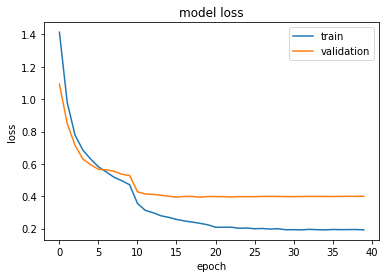

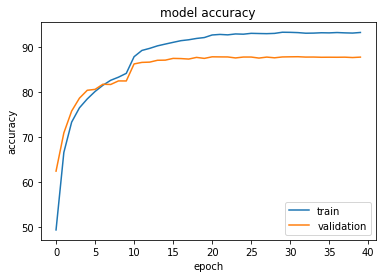

In [ ]:
# Finished
print('Finished Training')
plt.plot(trLosses)
plt.plot(valLosses)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.plot(trAccs)
plt.plot(valAccs)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

Dropout 0.05; 0.1; 0.2

In [ ]:
for epoch in range(epochNumber):
  print("Train epoch %d loss: %.3f correct: %.2f" % (epoch + 1, trLosses[epoch], trAccs[epoch]))
  print("Test epoch %d loss: %.3f correct: %.2f" % (epoch + 1, valLosses[epoch], valAccs[epoch]))

Train epoch 1 loss: 1.397 correct: 50.04
Test epoch 1 loss: 1.057 correct: 63.94
Train epoch 2 loss: 0.945 correct: 67.57
Test epoch 2 loss: 0.860 correct: 70.62
Train epoch 3 loss: 0.738 correct: 74.78
Test epoch 3 loss: 0.695 correct: 76.38
Train epoch 4 loss: 0.633 correct: 78.51
Test epoch 4 loss: 0.633 correct: 78.50
Train epoch 5 loss: 0.573 correct: 80.49
Test epoch 5 loss: 0.584 correct: 80.79
Train epoch 6 loss: 0.518 correct: 82.38
Test epoch 6 loss: 0.572 correct: 81.12
Train epoch 7 loss: 0.479 correct: 83.61
Test epoch 7 loss: 0.540 correct: 82.17
Train epoch 8 loss: 0.450 correct: 84.73
Test epoch 8 loss: 0.531 correct: 82.42
Train epoch 9 loss: 0.419 correct: 85.83
Test epoch 9 loss: 0.519 correct: 83.01
Train epoch 10 loss: 0.402 correct: 86.35
Test epoch 10 loss: 0.523 correct: 83.21
Train epoch 11 loss: 0.282 correct: 90.46
Test epoch 11 loss: 0.436 correct: 86.28
Train epoch 12 loss: 0.234 correct: 91.94
Test epoch 12 loss: 0.426 correct: 86.98
Train epoch 13 loss: 0

Finished Training


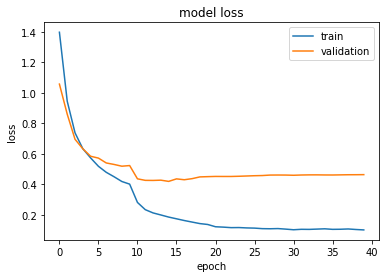

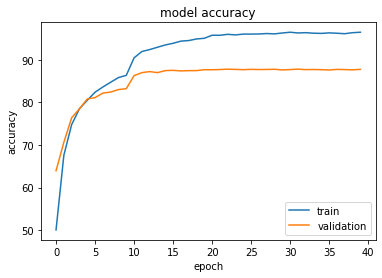

In [ ]:
# Finished
print('Finished Training')
plt.plot(trLosses)
plt.plot(valLosses)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.plot(trAccs)
plt.plot(valAccs)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

##MNIST

In [ ]:
for epoch in range(epochNumber):
  print("Train epoch %d loss: %.3f correct: %.2f" % (epoch + 1, trLosses[epoch], trAccs[epoch]))
  print("Validate epoch %d loss: %.3f correct: %.2f" % (epoch + 1, valLosses[epoch], valAccs[epoch]))

Train epoch 1 loss: 0.148 correct: 95.35
Validate epoch 1 loss: 0.036 correct: 98.88
Train epoch 2 loss: 0.032 correct: 98.98
Validate epoch 2 loss: 0.035 correct: 98.93
Train epoch 3 loss: 0.020 correct: 99.38
Validate epoch 3 loss: 0.028 correct: 99.14
Train epoch 4 loss: 0.015 correct: 99.51
Validate epoch 4 loss: 0.030 correct: 99.13
Train epoch 5 loss: 0.010 correct: 99.70
Validate epoch 5 loss: 0.029 correct: 99.11
Train epoch 6 loss: 0.008 correct: 99.75
Validate epoch 6 loss: 0.026 correct: 99.28
Train epoch 7 loss: 0.007 correct: 99.79
Validate epoch 7 loss: 0.025 correct: 99.30
Train epoch 8 loss: 0.005 correct: 99.84
Validate epoch 8 loss: 0.028 correct: 99.27
Train epoch 9 loss: 0.005 correct: 99.85
Validate epoch 9 loss: 0.030 correct: 99.25
Train epoch 10 loss: 0.003 correct: 99.91
Validate epoch 10 loss: 0.024 correct: 99.39
Train epoch 11 loss: 0.001 correct: 99.98
Validate epoch 11 loss: 0.022 correct: 99.44
Train epoch 12 loss: 0.001 correct: 99.99
Validate epoch 12 l

Finished Training


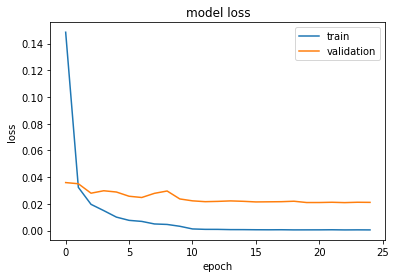

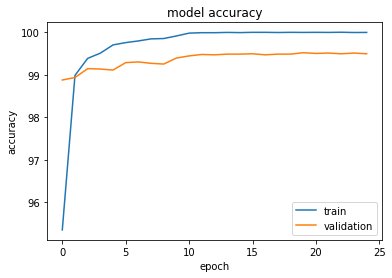

In [ ]:
# Finished
print('Finished Training')
plt.plot(trLosses)
plt.plot(valLosses)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.plot(trAccs)
plt.plot(valAccs)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

Finished Training


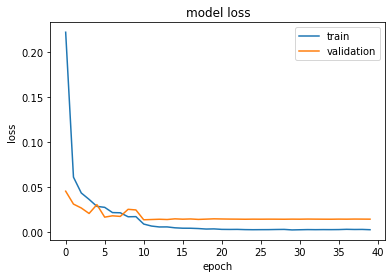

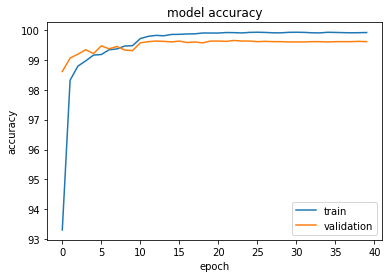

In [ ]:
# Finished
print('Finished Training')
plt.plot(trLosses)
plt.plot(valLosses)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.plot(trAccs)
plt.plot(valAccs)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [ ]:
for epoch in range(epochNumber):
  print("Train epoch %d loss: %.3f correct: %.2f" % (epoch + 1, trLosses[epoch], trAccs[epoch]))
  print("Test epoch %d loss: %.3f correct: %.2f" % (epoch + 1, valLosses[epoch], valAccs[epoch]))

Train epoch 1 loss: 0.153 correct: 95.32
Test epoch 1 loss: 0.040 correct: 98.85
Train epoch 2 loss: 0.041 correct: 98.80
Test epoch 2 loss: 0.028 correct: 99.15
Train epoch 3 loss: 0.031 correct: 99.16
Test epoch 3 loss: 0.024 correct: 99.32
Train epoch 4 loss: 0.025 correct: 99.28
Test epoch 4 loss: 0.026 correct: 99.11
Train epoch 5 loss: 0.022 correct: 99.40
Test epoch 5 loss: 0.020 correct: 99.46
Train epoch 6 loss: 0.016 correct: 99.52
Test epoch 6 loss: 0.021 correct: 99.36
Train epoch 7 loss: 0.014 correct: 99.58
Test epoch 7 loss: 0.021 correct: 99.33
Train epoch 8 loss: 0.014 correct: 99.56
Test epoch 8 loss: 0.027 correct: 99.23
Train epoch 9 loss: 0.011 correct: 99.65
Test epoch 9 loss: 0.019 correct: 99.52
Train epoch 10 loss: 0.010 correct: 99.68
Test epoch 10 loss: 0.034 correct: 99.09
Train epoch 11 loss: 0.006 correct: 99.82
Test epoch 11 loss: 0.015 correct: 99.58
Train epoch 12 loss: 0.003 correct: 99.93
Test epoch 12 loss: 0.014 correct: 99.60
Train epoch 13 loss: 0

Finished Training


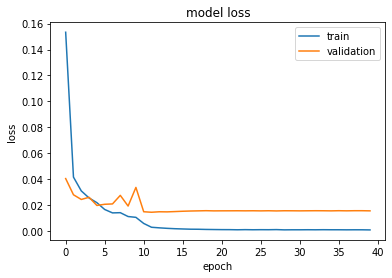

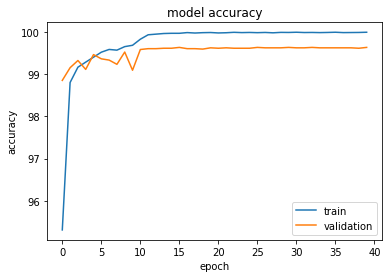

In [ ]:
# Finished
print('Finished Training')
plt.plot(trLosses)
plt.plot(valLosses)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.plot(trAccs)
plt.plot(valAccs)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

Dropout 0.05; 0.1; 0.2

In [ ]:
for epoch in range(epochNumber):
  print("Train epoch %d loss: %.3f correct: %.2f" % (epoch + 1, trLosses[epoch], trAccs[epoch]))
  print("Test epoch %d loss: %.3f correct: %.2f" % (epoch + 1, valLosses[epoch], valAccs[epoch]))

Train epoch 1 loss: 0.240 correct: 92.64
Test epoch 1 loss: 0.076 correct: 97.88
Train epoch 2 loss: 0.077 correct: 97.81
Test epoch 2 loss: 0.046 correct: 98.67
Train epoch 3 loss: 0.059 correct: 98.32
Test epoch 3 loss: 0.041 correct: 98.67
Train epoch 4 loss: 0.049 correct: 98.59
Test epoch 4 loss: 0.035 correct: 98.91
Train epoch 5 loss: 0.040 correct: 98.80
Test epoch 5 loss: 0.036 correct: 98.92
Train epoch 6 loss: 0.037 correct: 98.92
Test epoch 6 loss: 0.028 correct: 99.03
Train epoch 7 loss: 0.033 correct: 99.01
Test epoch 7 loss: 0.027 correct: 99.09
Train epoch 8 loss: 0.030 correct: 99.09
Test epoch 8 loss: 0.040 correct: 98.71
Train epoch 9 loss: 0.027 correct: 99.22
Test epoch 9 loss: 0.040 correct: 98.88
Train epoch 10 loss: 0.026 correct: 99.21
Test epoch 10 loss: 0.038 correct: 98.74
Train epoch 11 loss: 0.015 correct: 99.54
Test epoch 11 loss: 0.019 correct: 99.36
Train epoch 12 loss: 0.011 correct: 99.66
Test epoch 12 loss: 0.020 correct: 99.41
Train epoch 13 loss: 0

Finished Training


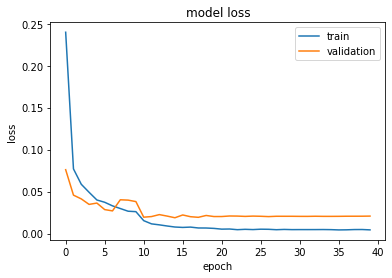

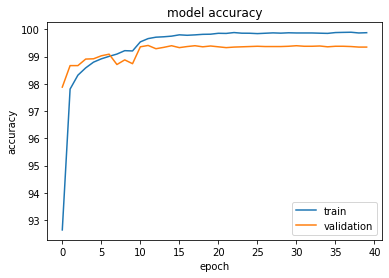

In [ ]:
# Finished
print('Finished Training')
plt.plot(trLosses)
plt.plot(valLosses)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.plot(trAccs)
plt.plot(valAccs)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

Dropout 0.2; 0.3; 0.4

In [ ]:
for epoch in range(epochNumber):
  print("Train epoch %d loss: %.3f correct: %.2f" % (epoch + 1, trLosses[epoch], trAccs[epoch]))
  print("Test epoch %d loss: %.3f correct: %.2f" % (epoch + 1, valLosses[epoch], valAccs[epoch]))

Train epoch 1 loss: 0.321 correct: 89.83
Test epoch 1 loss: 0.073 correct: 97.82
Train epoch 2 loss: 0.107 correct: 97.02
Test epoch 2 loss: 0.066 correct: 98.09
Train epoch 3 loss: 0.078 correct: 97.89
Test epoch 3 loss: 0.056 correct: 98.42
Train epoch 4 loss: 0.064 correct: 98.14
Test epoch 4 loss: 0.035 correct: 99.03
Train epoch 5 loss: 0.055 correct: 98.39
Test epoch 5 loss: 0.040 correct: 98.83
Train epoch 6 loss: 0.048 correct: 98.62
Test epoch 6 loss: 0.025 correct: 99.11
Train epoch 7 loss: 0.043 correct: 98.69
Test epoch 7 loss: 0.035 correct: 98.85
Train epoch 8 loss: 0.040 correct: 98.79
Test epoch 8 loss: 0.041 correct: 98.84
Train epoch 9 loss: 0.039 correct: 98.83
Test epoch 9 loss: 0.030 correct: 99.19
Train epoch 10 loss: 0.035 correct: 98.93
Test epoch 10 loss: 0.028 correct: 99.15
Train epoch 11 loss: 0.023 correct: 99.31
Test epoch 11 loss: 0.021 correct: 99.43
Train epoch 12 loss: 0.020 correct: 99.41
Test epoch 12 loss: 0.023 correct: 99.31
Train epoch 13 loss: 0

Finished Training


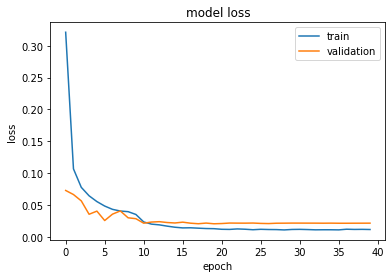

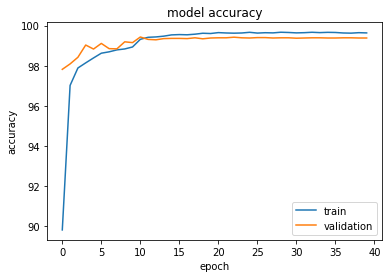

In [ ]:
# Finished
print('Finished Training')
plt.plot(trLosses)
plt.plot(valLosses)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.plot(trAccs)
plt.plot(valAccs)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

#Test

##CIFAR10

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


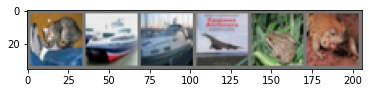

    cat    ship    ship   plane    frog    frog


In [ ]:
dataiter = iter(testLoader)
images, labels = dataiter.next()

sampleImages = []
for i in range(6):
    sampleImages.append(images[i])
    
# show images
imshow(torchvision.utils.make_grid(sampleImages))
# print labels
print(' '.join('%7s' % classes[labels[j]] for j in range(6)))

In [ ]:
outputs = net(images.cuda())

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%7s' % classes[predicted[j]]
                              for j in range(6)))

Predicted:      cat    ship    ship   plane    frog    frog


In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testLoader:
        images, labels = data
        outputs = net(images.cuda())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.cuda()).sum().item()

print('Accuracy of the network on the test images: %d %%' %(100*correct/total))

Accuracy of the network on the test images: 87 %


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testLoader:
        images, labels = data
        outputs = net(images.cuda())
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels.cuda()).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 93 %
Accuracy of   car : 92 %
Accuracy of  bird : 78 %
Accuracy of   cat : 67 %
Accuracy of  deer : 85 %
Accuracy of   dog : 84 %
Accuracy of  frog : 80 %
Accuracy of horse : 92 %
Accuracy of  ship : 96 %
Accuracy of truck : 92 %


##MNIST

In [ ]:
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = (img * trainStd) + trainMean      # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


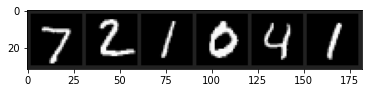

      7       2       1       0       4       1


In [ ]:
dataiter = iter(testLoader)
images, labels = dataiter.next()

sampleImages = []
for i in range(6):
    sampleImages.append(images[i])
    
# show images
imshow(torchvision.utils.make_grid(sampleImages))
# print labels
print(' '.join('%7s' % classes[labels[j]] for j in range(6)))

In [ ]:
outputs = net(images.cuda())

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%7s' % classes[predicted[j]]
                              for j in range(6)))

Predicted:        7       2       1       0       4       1


In [ ]:
correct = 0
total = 0
wrong = []
batch = 0;
with torch.no_grad():
    for data in testLoader:
        images, labels = data
        outputs = net(images.cuda())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.cuda()).sum().item()

        # batch, position, true, predicted
        for i in range(len(images)):
          if (predicted[i].cpu().numpy() != labels.cuda()[i].cpu().numpy()):
            wrong.append([batch, i, labels.cuda()[i].cpu().numpy(), predicted[i].cpu().numpy()])

        batch += 1

print('Accuracy of the network on the test images: %f %%' %(100*correct/total))

Accuracy of the network on the test images: 99.590000 %


In [ ]:
correct = 0
total = 0
wrong = []
batch = 0;
with torch.no_grad():
    for data in testLoader:
        images, labels = data
        outputs = net(images.cuda())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.cuda()).sum().item()

        # batch, position, true, predicted
        for i in range(len(images)):
          if (predicted[i].cpu().numpy() != labels.cuda()[i].cpu().numpy()):
            wrong.append([batch, i, labels.cuda()[i].cpu().numpy(), predicted[i].cpu().numpy()])

        batch += 1

print('Accuracy of the network on the test images: %f %%' %(100*correct/total))

Accuracy of the network on the test images: 99.660000 %


In [ ]:
correct = 0
total = 0
wrong = []
batch = 0;
with torch.no_grad():
    for data in testLoader:
        images, labels = data
        outputs = net(images.cuda())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.cuda()).sum().item()

        # batch, position, true, predicted
        for i in range(len(images)):
          if (predicted[i].cpu().numpy() != labels.cuda()[i].cpu().numpy()):
            wrong.append([batch, i, labels.cuda()[i].cpu().numpy(), predicted[i].cpu().numpy()])

        batch += 1

print('Accuracy of the network on the test images: %f %%' %(100*correct/total))

Accuracy of the network on the test images: 99.640000 %


In [ ]:
dataiter = iter(testLoader)
batch = 0;
sampleImages = []

for i in range(len(dataiter)):
  images, labels = dataiter.next()
  for j in range(len(wrong)):
    if (batch == wrong[j][0]):
      sampleImages.append(images[wrong[j][1]])
  batch += 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


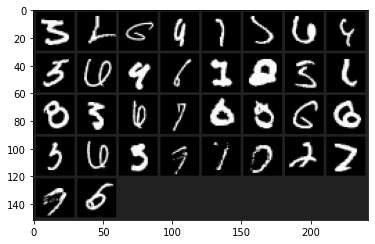

In [ ]:
imshow(torchvision.utils.make_grid(sampleImages))

In [ ]:
for i in range(len(wrong)):
  print(wrong[i])

[3, 65, array(3), array(5)]
[5, 6, array(2), array(6)]
[7, 118, array(6), array(0)]
[9, 80, array(9), array(4)]
[9, 108, array(7), array(1)]
[10, 113, array(5), array(3)]
[11, 36, array(6), array(0)]
[14, 109, array(9), array(4)]
[15, 115, array(5), array(3)]
[16, 70, array(6), array(0)]
[16, 82, array(4), array(9)]
[16, 87, array(6), array(1)]
[17, 6, array(1), array(3)]
[19, 30, array(2), array(0)]
[20, 37, array(5), array(3)]
[20, 94, array(6), array(1)]
[22, 80, array(8), array(0)]
[23, 9, array(3), array(5)]
[23, 86, array(6), array(0)]
[25, 25, array(7), array(9)]
[26, 94, array(6), array(0)]
[27, 102, array(5), array(0)]
[30, 13, array(6), array(0)]
[35, 91, array(6), array(8)]
[37, 4, array(3), array(5)]
[37, 78, array(6), array(0)]
[46, 49, array(5), array(3)]
[51, 43, array(9), array(7)]
[51, 48, array(7), array(1)]
[51, 69, array(0), array(7)]
[57, 104, array(2), array(7)]
[64, 124, array(7), array(2)]
[75, 42, array(9), array(7)]
[76, 1, array(5), array(6)]


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testLoader:
        images, labels = data
        outputs = net(images.cuda())
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels.cuda()).squeeze()
        for i in range(len(images)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %1s : %2f %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of 0 : 99.897959 %
Accuracy of 1 : 99.911894 %
Accuracy of 2 : 99.806202 %
Accuracy of 3 : 99.603960 %
Accuracy of 4 : 99.796334 %
Accuracy of 5 : 99.215247 %
Accuracy of 6 : 99.269311 %
Accuracy of 7 : 99.513619 %
Accuracy of 8 : 99.794661 %
Accuracy of 9 : 99.405352 %


In [ ]:
net.eval()
conf = torch.zeros(10,10)

# Epoch loop
for i, data in enumerate(testLoader, 0):
  # get the inputs
  inputs, labels = data

  # Convert to cuda conditionally
  if haveCuda:
      inputs, labels = inputs.cuda(), labels.cuda()

  # forward
  outputs = net(inputs)

  # compute statistics
  _, predicted = torch.max(outputs, 1)
  for label,pred in zip (labels,predicted):
    conf[label,pred] += 1

# print(conf)

In [ ]:
conf_array=conf.numpy()

In [ ]:
for i in range(10):
  line=""
  for j in range(10):
    line+='| %4d ' % conf_array[i][j]
  line+='|'
  print(line)

|  979 |    0 |    0 |    0 |    0 |    0 |    0 |    1 |    0 |    0 |
|    0 | 1134 |    0 |    1 |    0 |    0 |    0 |    0 |    0 |    0 |
|    0 |    0 | 1030 |    0 |    0 |    0 |    0 |    2 |    0 |    0 |
|    0 |    0 |    0 | 1006 |    0 |    3 |    0 |    0 |    0 |    1 |
|    0 |    0 |    0 |    0 |  980 |    0 |    0 |    0 |    0 |    2 |
|    1 |    0 |    0 |    5 |    0 |  885 |    1 |    0 |    0 |    0 |
|    4 |    1 |    0 |    0 |    1 |    0 |  951 |    0 |    1 |    0 |
|    0 |    2 |    3 |    0 |    0 |    0 |    0 | 1023 |    0 |    0 |
|    0 |    0 |    0 |    1 |    0 |    0 |    0 |    0 |  972 |    1 |
|    0 |    0 |    0 |    0 |    5 |    0 |    0 |    0 |    1 | 1003 |
